<a href="https://colab.research.google.com/github/Nuraniisti/Evaluasi-Kinerja-Buruh-serta-Prediksi-Kerusakan-Mesin-pada-Pabrik-Garmen/blob/main/Capstone_Project_Nurani_Istiaen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection & Data Understanding**

Dataset yang digunakan adalah dataset kinerja buruh perusahaan garmen untuk memprediksi efektivitas buruh. Karena sebagian besar proses pada pabriknya masih dilakukan secara manual, maka penting bagi perusahaan untuk mengetahui seberapa efektif dan efisien kinerja buruhnya sehingga perusahaan bisa melakukan intervensi tertentu jika efektivitas kinerja buruh mulai turun dan memberikan insentif jika kinerja buruh baik dan stabil. Sebelum itu, penting untuk memprediksi apakah terdapat kerusakan pada mesin atau tidak yang menjadi salah satu faktor kinerja buruh, dengan menggunakan model machine learning untuk menjelaskan dampak dari tiap variabel sehingga dapat diketahui mesin mana yang akan mengalami kerusakan pada kondisi pengujian tertentu.

In [65]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# import python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Download file dari github
url = 'https://raw.githubusercontent.com/Nuraniisti/Prediction-of-Garment-Employees-Effectiveness/main/garments_worker_productivity.csv'
df = pd.read_csv(url)

In [67]:
# Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [68]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [69]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

# **Data Cleaning**

In [70]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [71]:
#handling missing value
df= df.fillna({
        'wip': 0,
        })

In [80]:
has_decimal = (df['no_of_workers'] % 1 != 0).any()

# Jika ada bilangan desimal, membulatkannya ke atas
if has_decimal:
    df['no_of_workers'] = np.ceil(df['no_of_workers'])

In [81]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [82]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [83]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,687.228070,1514.582341,0.000000,0.000000,586.000000,1083.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.596491,22.180472,2.000000,9.000000,34.000000,57.000000,89.000000


In [84]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['date', 'quarter', 'department', 'day'], dtype='object')

In [85]:
categorical.describe().T

,count,unique,top,freq
date,1197,59,3/11/2015,24
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208


In [86]:
df=df.replace(['finishing '], ['finishing'])
df=df.replace(['sweing'], ['sewing'])
df.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

# **Exploratory Data Analysis**

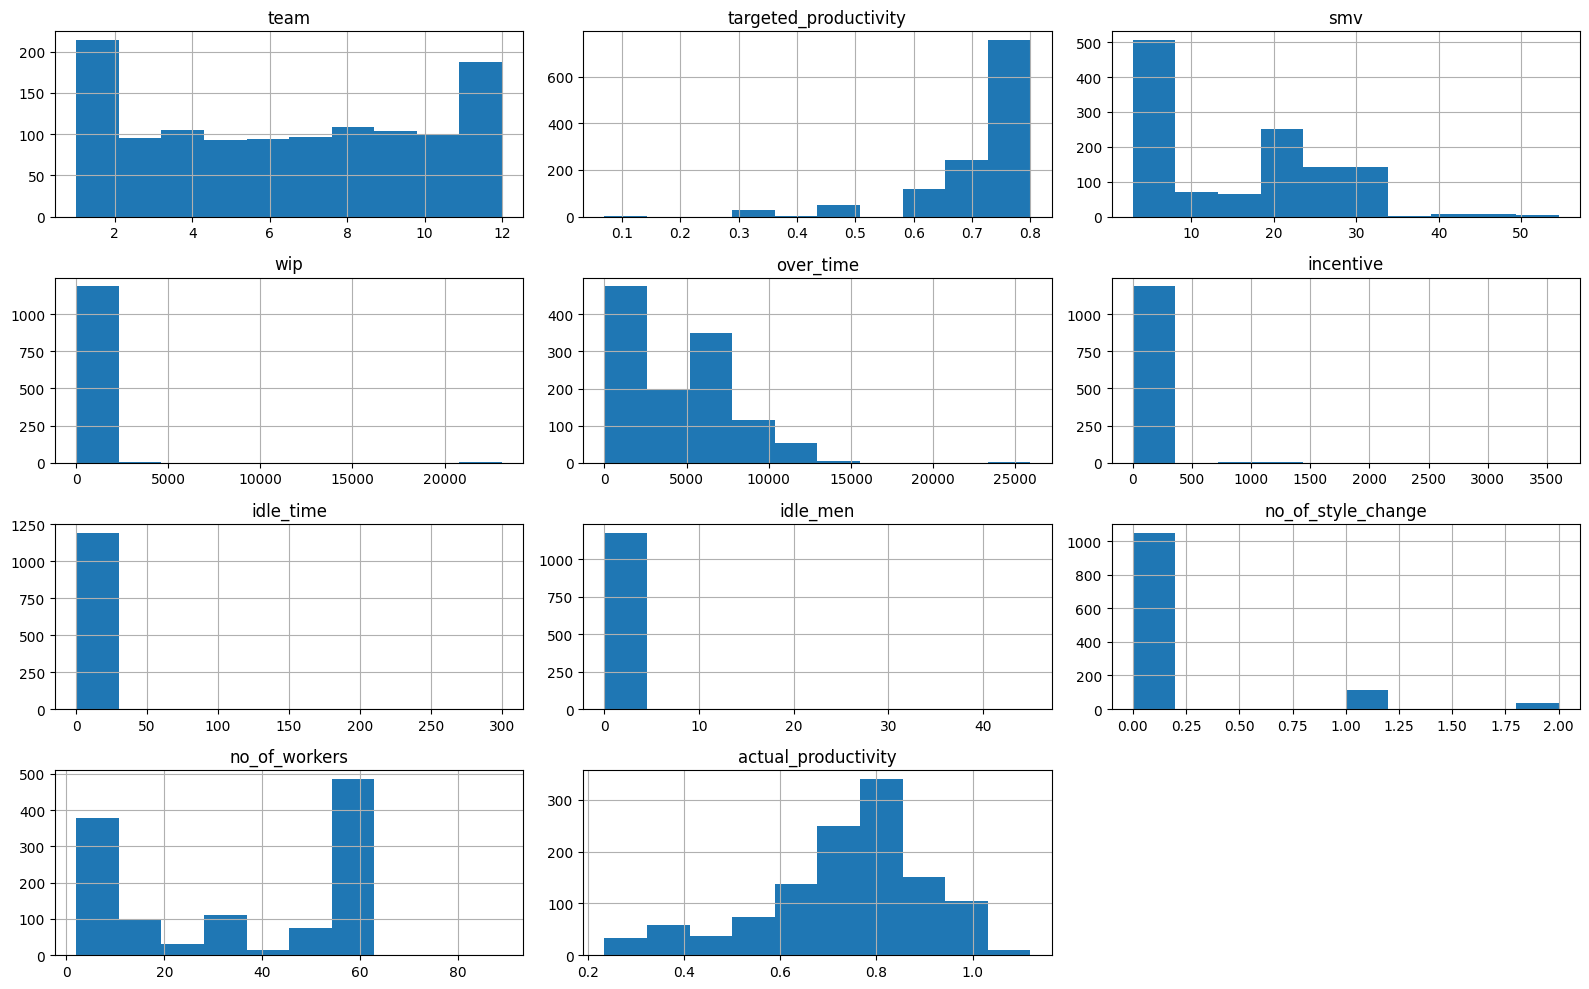

In [87]:
#Melihat persebaran data pada setiap kolom
df.hist(figsize=(16, 10))
plt.tight_layout()
plt.show()


In [88]:
for i in categorical:
  print('-----'*5)
  print(i)
  print(df[i].value_counts())

-------------------------
date
date
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: count, dtype: 

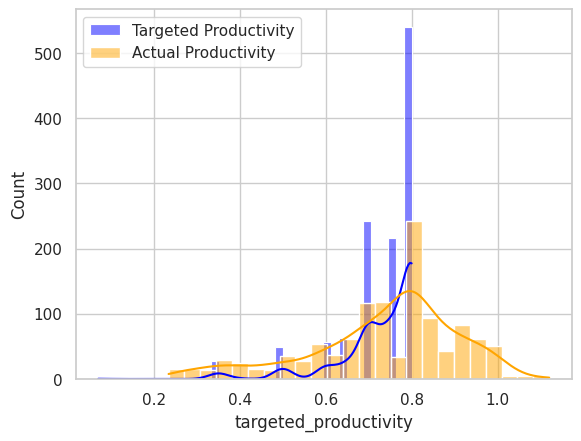

In [152]:
# Membandingkan targeted_productivity dan actual_productivity
sns.histplot(data=df, x='targeted_productivity', color='blue', label='Targeted Productivity', kde=True)
sns.histplot(data=df, x='actual_productivity', color='orange', label='Actual Productivity', kde=True)

plt.legend()
plt.show()

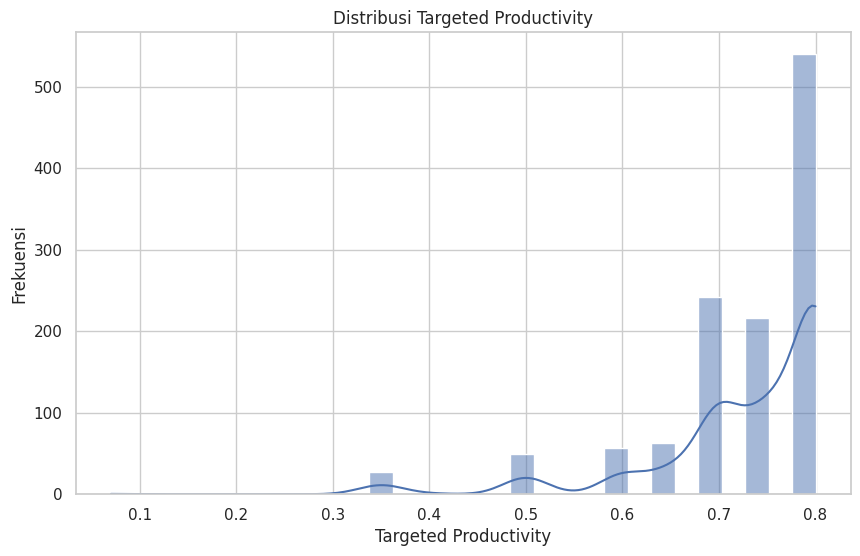

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64
targeted_productivity
0.07      1
0.35     27
0.40      2
0.50     49
0.60     57
0.65     63
0.70    242
0.75    216
0.80    540
Name: count, dtype: int64


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram untuk melihat distribusi nilai
plt.figure(figsize=(10, 6))
sns.histplot(df['targeted_productivity'], bins=30, kde=True)
plt.title('Distribusi Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frekuensi')
plt.show()

# Melihat ringkasan statistik dari kolom targeted_productivity
print(df['targeted_productivity'].describe())

# Melihat frekuensi dari masing-masing nilai dalam kolom targeted_productivity
print(df['targeted_productivity'].value_counts().sort_index())


### Target vs Actual Productivity

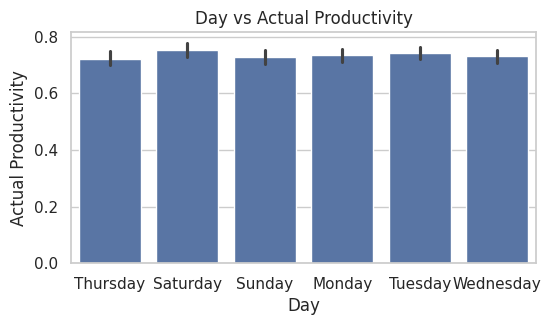

In [115]:
plt.figure(figsize=(6, 3))
sns.barplot(x='day', y='actual_productivity', data=df)
plt.title('Day vs Actual Productivity')
plt.xlabel('Day')
plt.ylabel('Actual Productivity')
plt.show()

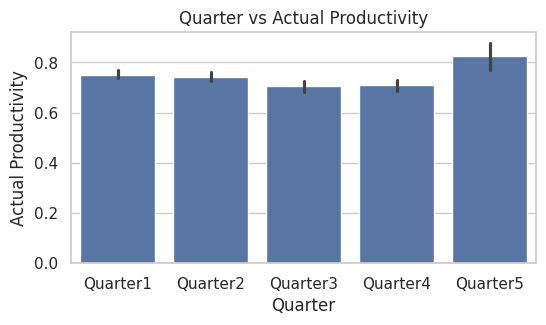

In [116]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(6, 3))
sns.barplot(x='quarter', y='actual_productivity', data=df)
plt.title('Quarter vs Actual Productivity')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()

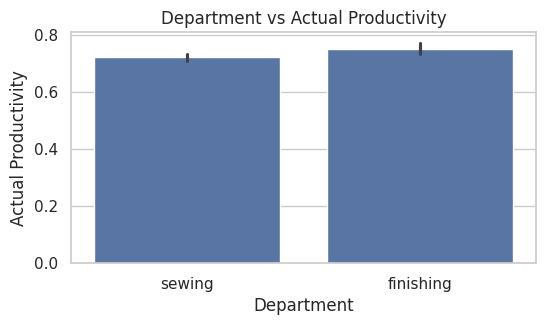

In [120]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(6, 3))
sns.barplot(x='department', y='actual_productivity', data=df)
plt.title('Department vs Actual Productivity')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

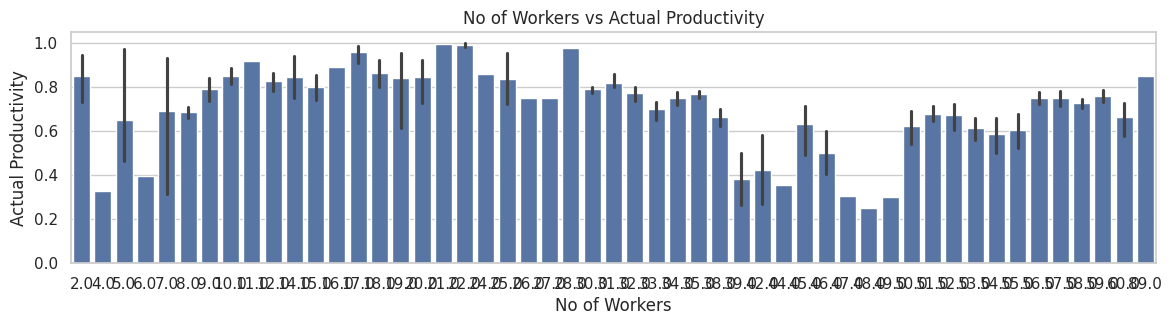

In [123]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(14, 3))
sns.barplot(x='no_of_workers', y='actual_productivity', data=df)
plt.title('No of Workers vs Actual Productivity')
plt.xlabel('No of Workers')
plt.ylabel('Actual Productivity')
plt.show()

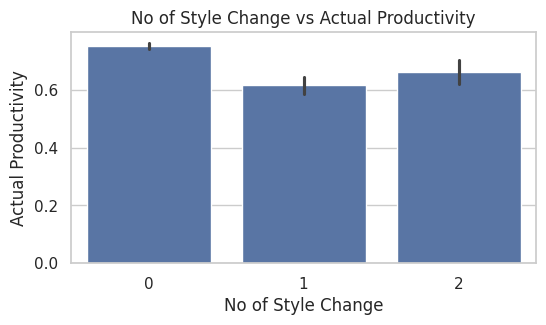

In [125]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(6, 3))
sns.barplot(x='no_of_style_change', y='actual_productivity', data=df)
plt.title('No of Style Change vs Actual Productivity')
plt.xlabel('No of Style Change')
plt.ylabel('Actual Productivity')
plt.show()

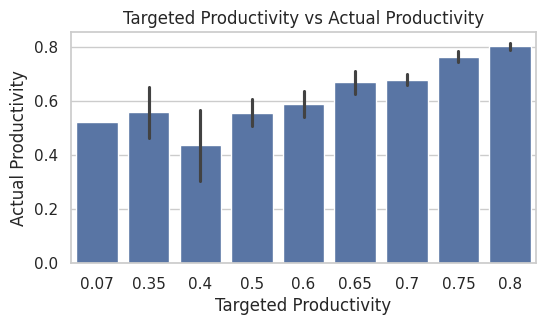

In [129]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(6, 3))
sns.barplot(x='targeted_productivity', y='actual_productivity', data=df)
plt.title('Targeted Productivity vs Actual Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.show()

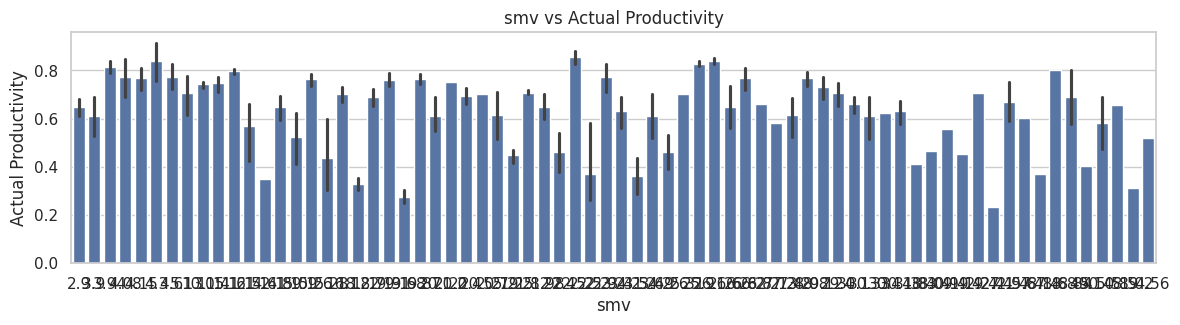

In [131]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(14, 3))
sns.barplot(x='smv', y='actual_productivity', data=df)
plt.title('smv vs Actual Productivity')
plt.xlabel('smv')
plt.ylabel('Actual Productivity')
plt.show()

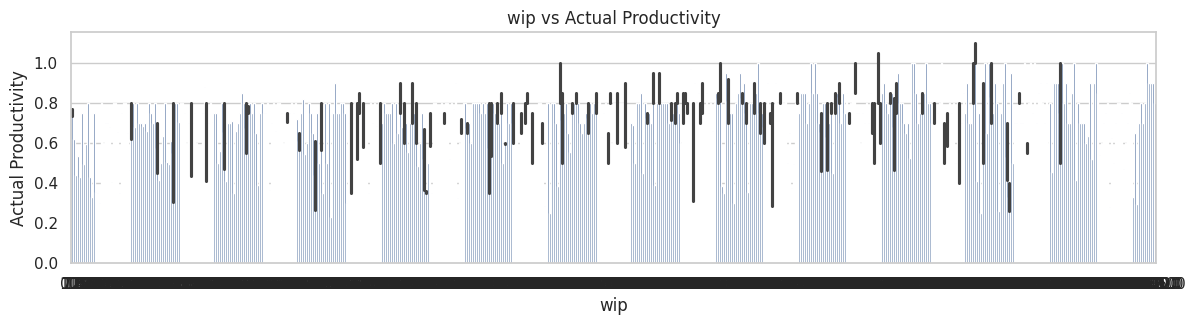

In [132]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(14, 3))
sns.barplot(x='wip', y='actual_productivity', data=df)
plt.title('wip vs Actual Productivity')
plt.xlabel('wip')
plt.ylabel('Actual Productivity')
plt.show()

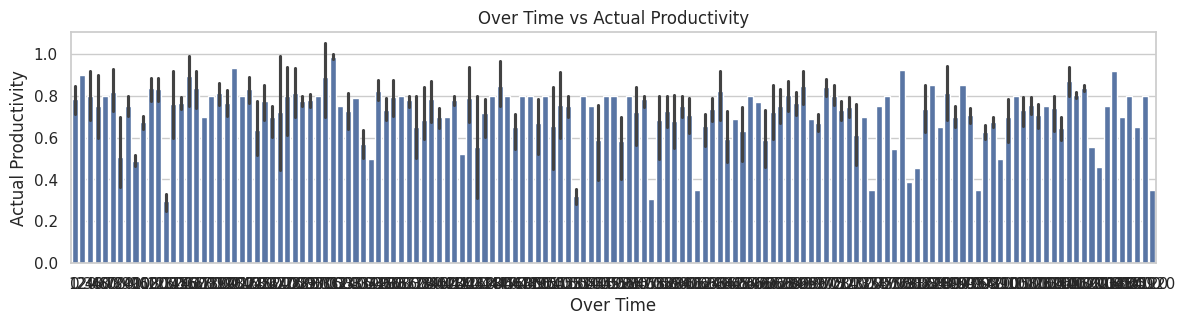

In [133]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(14, 3))
sns.barplot(x='over_time', y='actual_productivity', data=df)
plt.title('Over Time vs Actual Productivity')
plt.xlabel('Over Time')
plt.ylabel('Actual Productivity')
plt.show()

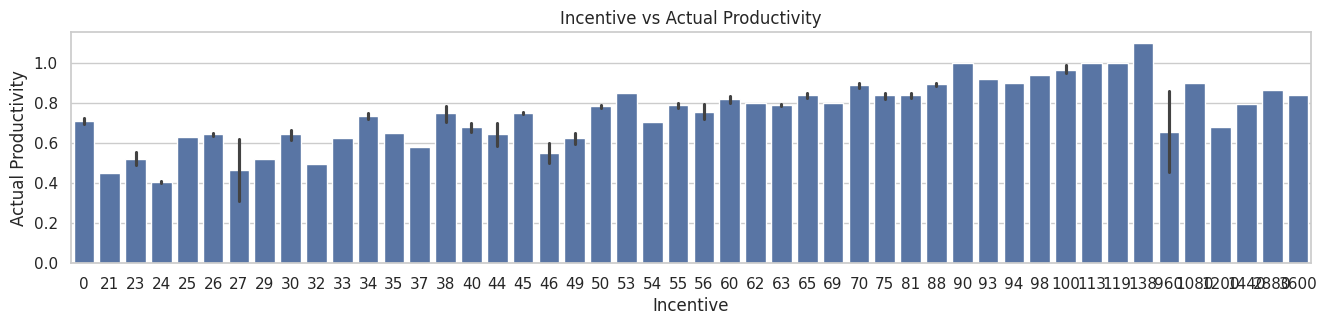

In [135]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(16, 3))
sns.barplot(x='incentive', y='actual_productivity', data=df)
plt.title('Incentive vs Actual Productivity')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.show()

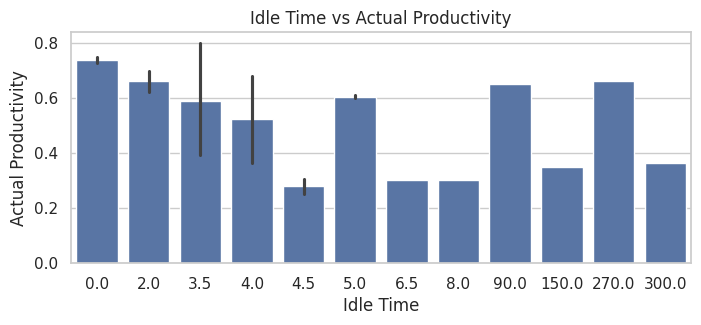

In [138]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(8, 3))
sns.barplot(x='idle_time', y='actual_productivity', data=df)
plt.title('Idle Time vs Actual Productivity')
plt.xlabel('Idle Time')
plt.ylabel('Actual Productivity')
plt.show()

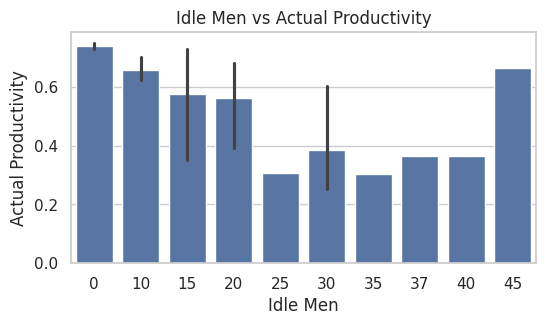

In [140]:
# Plot scatter plot for quarter vs actual_productivity
plt.figure(figsize=(6, 3))
sns.barplot(x='idle_men', y='actual_productivity', data=df)
plt.title('Idle Men vs Actual Productivity')
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

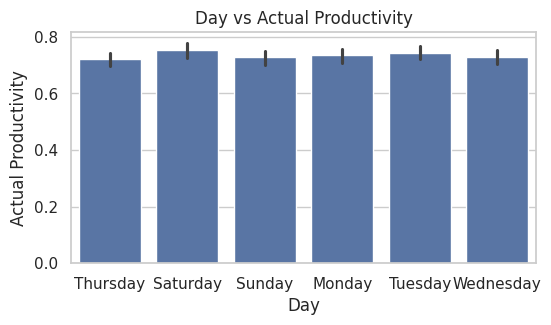

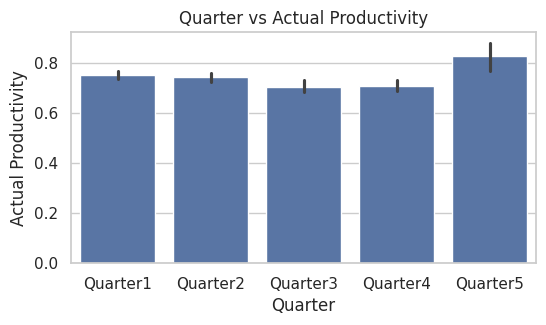

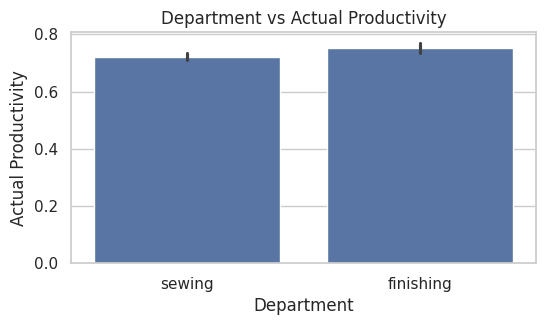

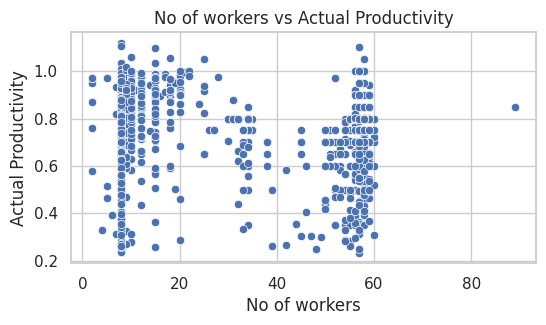

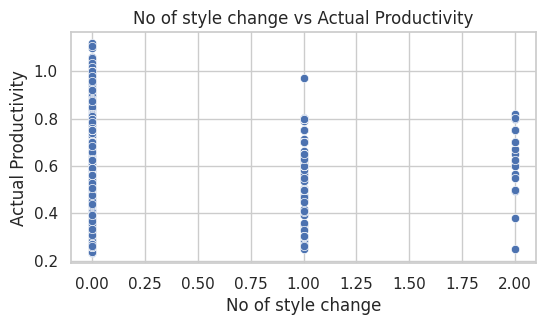

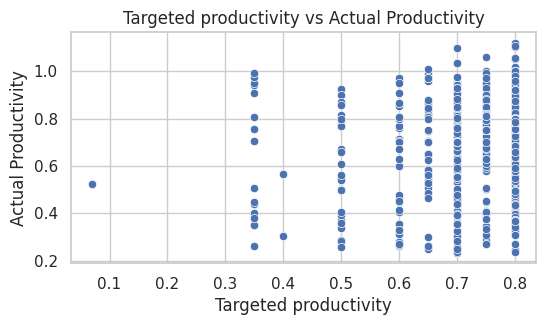

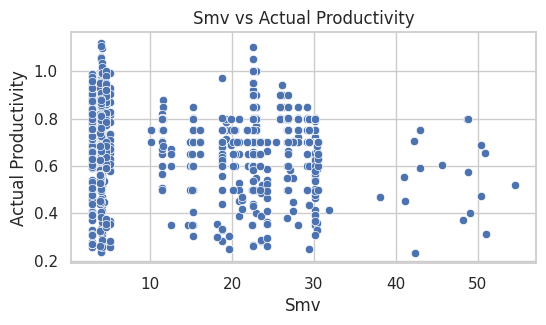

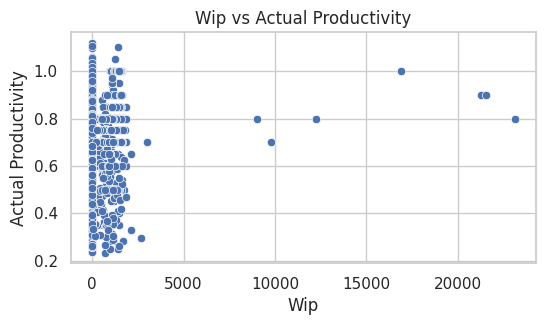

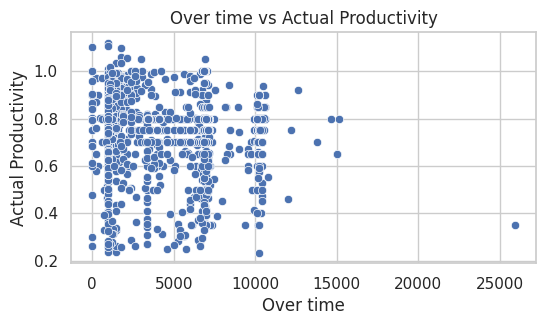

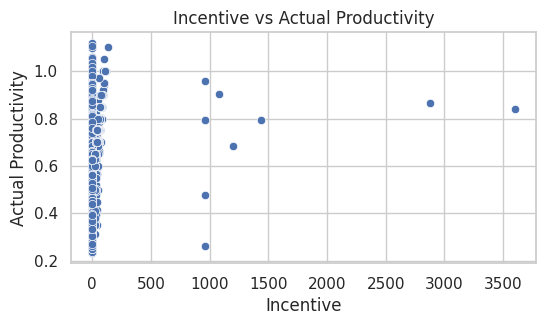

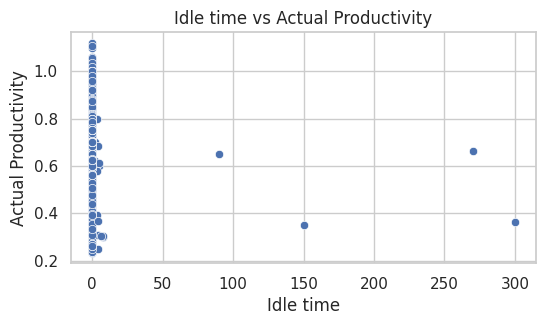

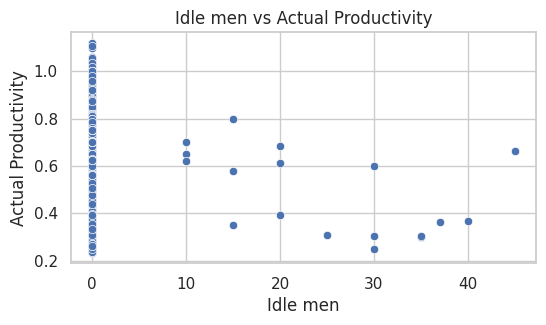

In [161]:
# Mengatur gaya visualisasi seaborn
sns.set(style="whitegrid")

# Plot untuk variabel kategorik
categorical_vars = ['day', 'quarter', 'department']
for var in categorical_vars:
    plt.figure(figsize=(6,3))
    sns.barplot(x=var, y='actual_productivity', data=df)
    plt.title(f'{var.capitalize()} vs Actual Productivity')
    plt.xlabel(var.capitalize())
    plt.ylabel('Actual Productivity')
    plt.show()

# Plot untuk variabel numerik
numerical_vars = [
    'no_of_workers', 'no_of_style_change', 'targeted_productivity',
    'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men'
]
for var in numerical_vars:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=var, y='actual_productivity', data=df)
    plt.title(f'{var.replace("_", " ").capitalize()} vs Actual Productivity')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Actual Productivity')
    plt.show()


In [156]:
# Menghitung korelasi Pearson untuk variabel numerik
correlation_matrix = df[numerical_vars + ['actual_productivity']].corr()
print(correlation_matrix['actual_productivity'].sort_values(ascending=False))

actual_productivity      1.000000
targeted_productivity    0.421594
incentive                0.076538
wip                      0.047389
over_time               -0.054206
no_of_workers           -0.058155
idle_time               -0.080851
smv                     -0.122089
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


In [162]:
df.duplicated().sum()

0

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Convert categorical data to numerical
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R^2 Score: {r2:.4f}\n')

# Baseline model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
evaluate_model(lr_model, X_test_scaled, y_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
evaluate_model(dt_model, X_test_scaled, y_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
evaluate_model(rf_model, X_test_scaled, y_test)

# Support Vector Regressor (RBF kernel)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
evaluate_model(svm_model, X_test_scaled, y_test)

# Multi-Layer Perceptron Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
evaluate_model(mlp_model, X_test_scaled, y_test)


Model: LinearRegression
Mean Squared Error: 0.0047
R^2 Score: 0.7742

Model: DecisionTreeRegressor
Mean Squared Error: 0.0082
R^2 Score: 0.6069

Model: RandomForestRegressor
Mean Squared Error: 0.0033
R^2 Score: 0.8394

Model: SVR
Mean Squared Error: 0.0071
R^2 Score: 0.6596

Model: MLPRegressor
Mean Squared Error: 0.0222
R^2 Score: -0.0674



In [164]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate best model
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test_scaled, y_test)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.797522264922323
Model: RandomForestRegressor
Mean Squared Error: 0.0034
R^2 Score: 0.8382



In [167]:
# Convert categorical data to numerical
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define evaluation metrics
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

smape_scorer = make_scorer(smape, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Hyperparameter tuning and model evaluation
def hyperparameter_tuning_and_evaluation(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring=rmse_scorer)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    rmse_value = rmse(y_test, y_pred)
    smape_value = smape(y_test, y_pred)

    print(f"Model: {best_model.__class__.__name__}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"RMSE: {rmse_value:.4f}")
    print(f"SMAPE: {smape_value:.4f}\n")

    return best_model, rmse_value, smape_value

# Linear Regression (Baseline)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"Linear Regression - RMSE: {rmse(y_test, y_pred_lr):.4f}, SMAPE: {smape(y_test, y_pred_lr):.4f}\n")

# Decision Tree Regressor
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model, dt_rmse, dt_smape = hyperparameter_tuning_and_evaluation(DecisionTreeRegressor(random_state=42), dt_param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest Regressor
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model, rf_rmse, rf_smape = hyperparameter_tuning_and_evaluation(RandomForestRegressor(random_state=42), rf_param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

# Support Vector Regressor (SVR)
svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}
svr_model, svr_rmse, svr_smape = hyperparameter_tuning_and_evaluation(SVR(), svr_param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

# Multi-Layer Perceptron (MLP) Regressor
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}
mlp_model, mlp_rmse, mlp_smape = hyperparameter_tuning_and_evaluation(MLPRegressor(random_state=42), mlp_param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

# Summarize results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'MLP'],
    'RMSE': [rmse(y_test, y_pred_lr), dt_rmse, rf_rmse, svr_rmse, mlp_rmse],
    'SMAPE': [smape(y_test, y_pred_lr), dt_smape, rf_smape, svr_smape, mlp_smape]
}

results_df = pd.DataFrame(results)
print(results_df)

# Select best model
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest Model: {best_model['Model']}")
print(f"RMSE: {best_model['RMSE']:.4f}")
print(f"SMAPE: {best_model['SMAPE']:.4f}")


Linear Regression - RMSE: 0.0685, SMAPE: 8.0260

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Model: DecisionTreeRegressor
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE: 0.0838
SMAPE: 7.8535

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Model: RandomForestRegressor
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 0.0580
SMAPE: 5.6404

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: SVR
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
RMSE: 0.0844
SMAPE: 10.4459

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Model: MLPRegressor
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 100, 50), 'max_iter': 500, 'solver': 'adam'}
RMSE: 0.0843
SMAPE: 9.4471

               Model      RMSE      SMAPE
0  Linear Regression  0.068529   8.026034
1      Decision Tree  0.083832   7.853456
2      Random Fore

### Multivariate Analysis

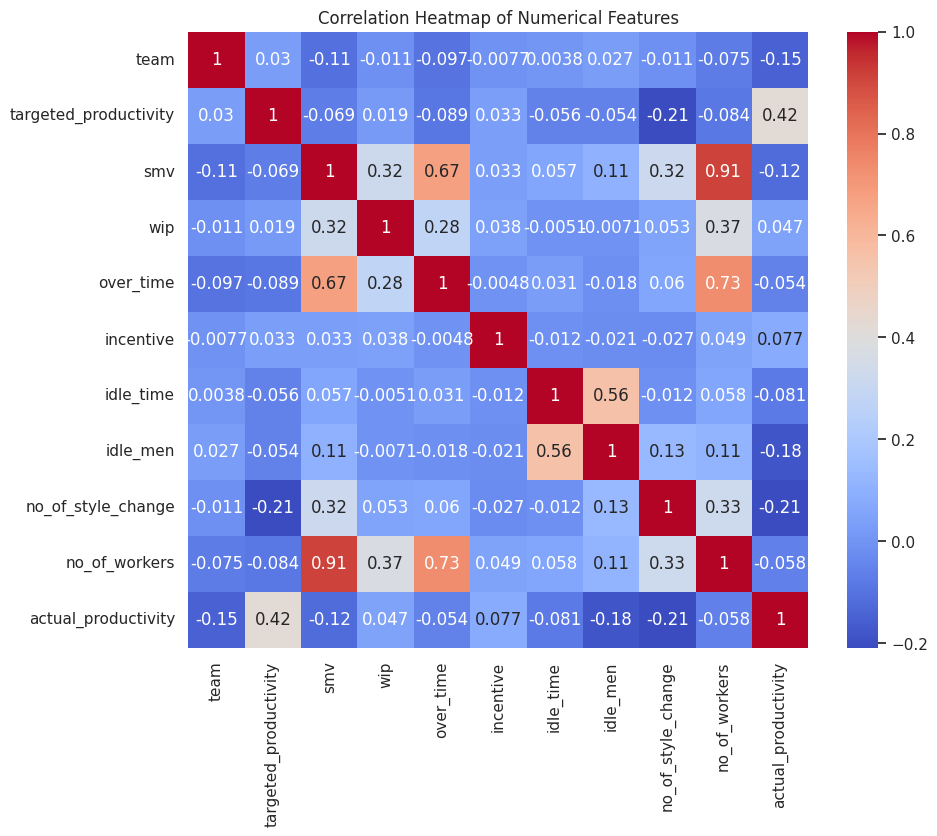

In [151]:
numerical_corr_matrix = df[num].corr()
plt.subplots(figsize=(10, 8))

sns.heatmap(numerical_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
#Correlation between actual productivity and all features
corrMatrix = df.corr()

plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);